# AML 3104 - Neural Networks and Deep Learning

**Group members:**

* Carlos Mauricio Munoz Ebratt
* Luis Alejandro Gutierrez Hayek
* Oscar Felipe Fernandez Tovar

**Objective:**

For this final project, we are asked to select a house Pricing dataset and solve either the classification or regression problem using Machine Learning or Deep Learning techniques, or a combination of both.


**Steps to follow:**

1. Dataset Selection
Choose a dataset related to housing prices, either for regression or classification.
2. Data Cleaning
Address missing values, handle outliers, and ensure the dataset is ready for exploration.
3. Data Exploration
Utilize statistical and visual methods to understand the data. Plot distributions, correlations, and identify patterns.
4. Feature Engineering
Create new features, handle categorical variables, and transform data to improve model performance.
5. Model Selection
Choose multiple models for experimentation. For regression, you might use Linear Regression, Decision Trees, ANN models for regression . For classification, try Logistic Regression, Decision Trees, SVM, ANN.
6. Hyperparameter Tuning
Optimize model performance using techniques like GridSearchCV or RandomizedSearchCV to find the best hyperparameters.
7. Pickle Files
Save the trained models using the pickle library so they can be easily loaded for deployment.
8. Flask Web Application
Create a Flask web application. Design a simple UI where users can input data, and the application will return predictions.






#### Step 0. Importing all necessary libraries

In [66]:
# Importing all neccessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from warnings import simplefilter

# Suppress the warning
simplefilter('ignore', category=UserWarning)

### Step 1. Dataset selection

To achieve the expectationes of this project aasigment, a data set belonging to one of the advanced competitions in Kaggle was selected. This data set is divided into 2 files, one for training and one for testing, distributed as follows:
* Train: 81 columns and 1460 rows
* Test: 80 columns and 1459 rows

The goal is to predict the sales price for each house listed in the test portion of the dataset. For more information about the dataset and the description for each feature plese refer to the [kaggle competition here.](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

In [67]:
# Now we are reading both the train and test data

df = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [68]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 1.1 Data information

Before starting with the data analysis, it is important to understand what information is contained in the data set, so below we will describe each of these columns.


Type of Property and Zone
*	MSSubClass: This is Categorical Column telling the Type of Dwelling Sold.
*	MSZoning : This Tells the type of property i.e Residential, Agricultural etc. Sold.

Property Lot Configuration: These columns Tell the Size , type, shape etc. of the Lot

*	LotFrontage : Linear feet of street connected to property.
*	LotArea : Lot size in square feet.
*	LotShape : General shape of property.
*	LotConfig : Lot configuration.

Connectivity of plot
*	Street: Type of road access to property (Gravel/Paved).
*	Alley: Type of alley access to property (Gravel/Paved/No access).

Land Configuration
*	LandContour : Flatness of the property (Lvl/Bnk/HLS/Low) implying Leveled/Banked/Hillside/Depression
*	LandSlope: Slope of property (Gentle/Moderate/Severe)

Utilities and Neighbourhood Proximities
*	Utilities : Type of utilities available.
*	Neighborhood : Physical locations (25 categories) within Ames city limits. Example- Bloomington Heights, College Creek etc.
*	Condition1: Proximity to various conditions (9)
*	Condition2: Proximity to various conditions (9) (if more than one is present)

Building Details
*	BldgType: Type of dwelling (Single-family Detached/Two-family Conversion/Duplex/Townhouse End Unit/Townhouse Inside Unit)
*	HouseStyle: Tells the Story of House and whether it is finished or not. (8 cat)
*	OverallQual: Rates the overall material and finish of the house. (1-10)
*	OverallCond: Rates the overall condition of the house. (1-10)
*	YearBuilt : Year built
*	YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
*	RoofStyle: Type of roof (Flat/Gable/Gambrel/Hip/Mansard/Shed).

Material and Craftmanship
*	RoofMatl: Roof material. (8 categories)
*	Exterior1st: Exterior covering on house.(Material Used) (15 categ)
*	Exterior2nd: Exterior covering on house (if more than one material) (15 categ)
*	MasVnrType: Masonry veneer type (5)
*	MasVnrArea: Masonry veneer area in square feet
*	ExterQual: Evaluates the quality of the material on the exterior (5)
*	ExterCond: Evaluates the present condition of the material on the exterior.(5)
*	Foundation: Type of foundation.(6)

Basement
*	BsmtQual: Evaluates the height of the basement.(6)
*	BsmtCond: Evaluates the general condition of the basement. (6)
*	BsmtExposure: Refers to walkout or garden level walls.(5)
*	BsmtFinType1: Rating of basement finished area.(7)
*	BsmtFinSF1: Type 1 finished square feet
*	BsmtFinType2: Rating of basement finished area (if multiple types) (7)
*	BsmtFinSF2: Type 2 finished square feet
*	BsmtUnfSF: Unfinished square feet of basement area.
*	TotalBsmtSF: Total square feet of basement area

Amenities
*	Heating: Type of heating.(6)
*	HeatingQC: Heating quality and condition.(5)
*	CentralAir: Central air conditioning, (Y/N)
*	Electrical: Electrical system. (5)

Areas
*	1stFlrSF: First Floor square feet
*	2ndFlrSF: Second floor square feet
*	LowQualFinSF: Low quality finished square feet (all floors)
*	GrLivArea: Above grade (ground) living area square feet
*	Bedroom, Bathroom, Kitchen, FirePlaces and Other Room details
*	BsmtFullBath: Basement full bathrooms
*	BsmtHalfBath: Basement half bathrooms
*	FullBath: Full bathrooms above grade
*	HalfBath: Half baths above grade
*	Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
*	Kitchen: Kitchens above grade
*	KitchenQual: Kitchen quality. (5)
*	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*	Functional: Home functionality (Assume typical unless deductions are warranted).(8)
*	Fireplaces: Number of fireplaces
*	FireplaceQu: Fireplace quality (5+1(no fireplace))

Garage
*	GarageType: Garage location. (6+1)
*	GarageYrBlt: Year garage was built.
*	GarageFinish: Interior finish of the garage.
*	GarageCars: Size of garage in car capacity.
*	GarageArea: Size of garage in square feet
*	GarageQual: Garage quality (5+1).
*	GarageCond: Garage condition (5+1).
*	PavedDrive: Paved driveway (Y(Yes),P(Partial)/N(Dirt/Gravel)).

Other Areas and Luxuries
*	WoodDeckSF: Wood deck area in square feet
*	OpenPorchSF: Open porch area in square feet
*	EnclosedPorch: Enclosed porch area in square feet
*	3SsnPorch: Three season porch area in square feet
*	ScreenPorch: Screen porch area in square feet
*	PoolArea: Pool area in square feet
*	PoolQC: Pool quality (4+1)
*	Fence: Fence quality (4+1)
*	MiscFeature: Miscellaneous feature not covered in other categories. (5+1)
*	MiscVal: $Value of miscellaneous feature

Sale Details
*	MoSold: Month Sold (MM)
*	YrSold: Year Sold (YYYY)
*	SaleType: Type of sale. (10)
*	SaleCondition: Condition of sale.(6)

### Step 2. Data Cleaning

To start cleaning the data we will check if there are duplicate rows

In [70]:
# Cheching if there are duplcates in the data

print(df.duplicated().sum())
print(dftest.duplicated().sum())


0
0


> After using the duplicates function we could observe that there are none in both the training dataset and the test dataset. Now We want to check if there are missing values ​​within both data sets.

In [71]:
# Checking the info and shape of the dataset along with the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [72]:
# Checking for missing values in the data set for each column, sortred in descending order with percentage of missing values.

missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing_percentage = missing / len(df) * 100
missing_df = pd.DataFrame({'Missing Values': missing, Percentage: missing_percentage})
missing_df

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


> As we can see, we have four columns that contain more than 80% of null values, so we are going to eliminate them and we can review the rest later.

In [73]:
# Dropping the columns with more than 80% missing values

df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
df.shape

(1460, 77)

> Now we have a data set with four fewer columns and the next step would be to check if there are outliers.

> Let's use Interquartile Range (IQR) to see how the outliers are distributed in the dataset. This method focuses on the quartiles of the data distribution. Outliers fall outside the upper and lower bounds calculated using the IQR and a threshold multiplier (typically 1.5). IQR is less sensitive to extreme outliers compared to z-scores and works well for skewed data.

> **Refrences:** [https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/](https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)

In [74]:
# Identifying outliers in each column

def get_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

outliers = get_outliers(df)

In [75]:
# Dataframe with outliers
outliers_df = pd.DataFrame(outliers.items(), columns=['column_name', 'outliers_count'])
outliers_df = outliers_df.sort_values(by='outliers_count', ascending=False)
outliers_df.head(10)

,column_name,outliers_count
30,EnclosedPorch,208
10,BsmtFinSF2,167
5,OverallCond,125
32,ScreenPorch,116
1,MSSubClass,103
8,MasVnrArea,96
2,LotFrontage,88
18,BsmtHalfBath,82
29,OpenPorchSF,77
3,LotArea,69


> Notice that there are 10 columns with potentially outliers values. Before taking any action, it's important to understand the outliers. Are they genuine data points or are errors is the main question. Let's plot a `Boxplot` before any action.

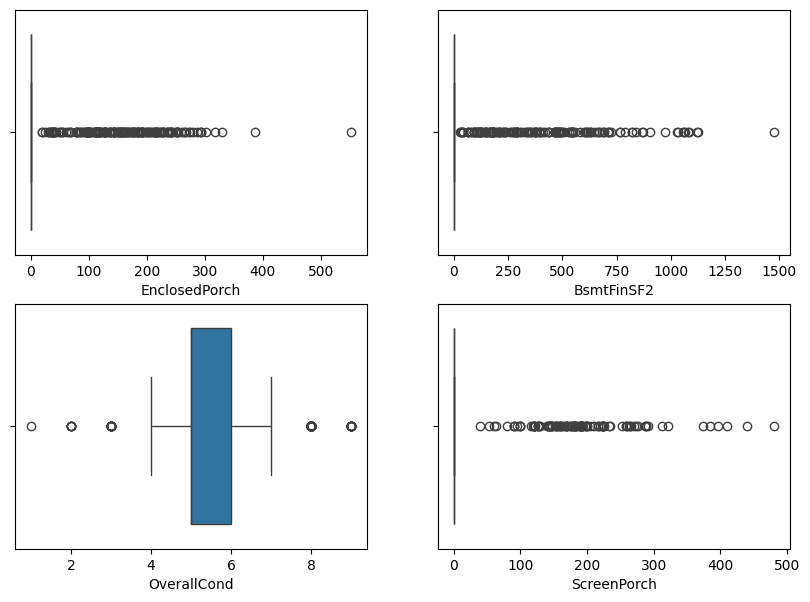

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Creating boxplots without specifying palette
sns.boxplot(ax=axes[0, 0], data=df, x='EnclosedPorch')
sns.boxplot(ax=axes[0, 1], data=df, x='BsmtFinSF2')
sns.boxplot(ax=axes[1, 0], data=df, x='OverallCond')
sns.boxplot(ax=axes[1, 1], data=df, x='ScreenPorch')

plt.show()

> The graph above helps us identify data points that are far from the data set average and that could potentially be outlets, however, in order to make a decision as to whether they really are or not, the context must be considered. For instance, the feature `OverallCond` Rates the overall condition of the house from 1 to 10 and it´s plausible to have a value 1 or 10. If we analyze other columns with potential outliers we can understand the relationship between `LotArea` and `ScreenPorch` and `EnclosedPorch` areas. 

In [77]:
# identifying whereas the lotarea value is less than encloseproch value

df['LotArea < EnclosedPorch'] = df['LotArea'] < df['EnclosedPorch']
df['LotArea < EnclosedPorch'].value_counts()


LotArea < EnclosedPorch
False    1460
Name: count, dtype: int64

> After analyzing and comparing the relationship between the total area of ​​the lot and what a porch can be or represent, I was able to notice that in neither case is the area of ​​the porch greater than the total area, so it can be a legitimate value and should not be discarded.

### Step 3. Data Exploration

> To begin exploring the data, we are going to use some graphs that allow us to identify the relationship between the columns and find out if there is a correlation between them. To do this, we are going to plot a heat map using just the numeric columns.

In [78]:
# Selecting jsut the numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

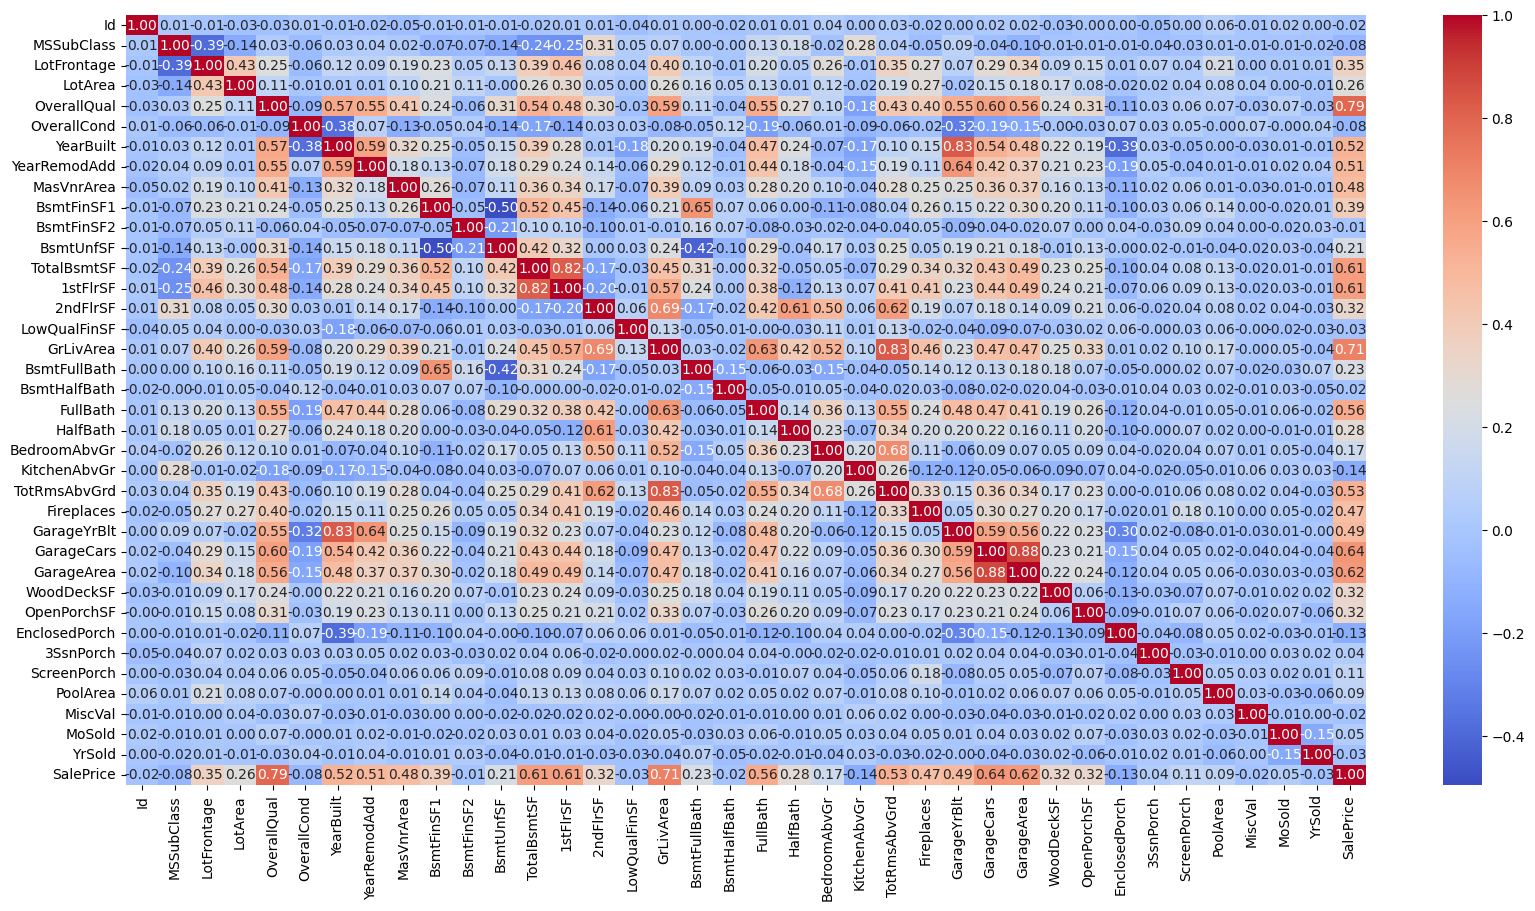

In [79]:
# Checking the correlation between the columns
correlation = df_num.corr()
correlation

# Plotting the heatmap of the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm',  fmt=".2f")
plt.show()

> The previous heat map allows us to identify which columns have high, low or moderate correlation with ``SalePrice`` which is the target variable. To categorize the columns based on their correlation with SalePrice, the following thresholds were used:
*	High Positive Correlation: r > 0.7
*	Moderate Positive Correlation: 0.3< r ≤ 0.7
*	Low Positive Correlation: 0.1< r ≤ 0.3
*	Low Negative Correlation: −0.3≤ r < −0.1
*	Very Low Correlation (Positive or Negative): −0.1 ≤ r ≤ 0.1

Some columns that are not strongly related to the target variable might be less useful in predictive modeling and might be candidates for dropping, like the ones in categories ``Low`` and ``Very Low``

> High Positive Correlation
*	OverallQual: 0.79 
*	GrLivArea: 0.71
*	GarageCars: 0.64
*	GarageArea: 0.62
*	TotalBsmtSF: 0.61
*	1stFlrSF: 0.61
> Moderate Positive Correlation  
*	FullBath: 0.56  
*	TotRmsAbvGrd: 0.53  
*	YearBuilt: 0.52  
*	YearRemodAdd: 0.51  
*	GarageYrBlt: 0.53  
*	MasVnrArea: 0.48
*	Fireplaces: 0.47
*	BsmtFinSF1: 0.39
*	LotFrontage: 0.35
*	WoodDeckSF: 0.32
*	2ndFlrSF: 0.32
*	OpenPorchSF: 0.32
> Low Positive Correlation 
*	HalfBath: 0.28
*	LotArea: 0.25
*	BsmtFullBath: 0.23
*	BsmtUnfSF: 0.21
*	BedroomAbvGr: 0.14
> Low Negative Correlation 
*	EnclosedPorch: -0.13
*	KitchenAbvGr: -0.14
*	MSSubClass: -0.08
*	OverallCond: -0.08
> Very Low Correlation (Positive or Negative) 
*	YrSold: -0.03
*	LowQualFinSF: -0.03
*	MiscVal: -0.02
*	Id: -0.02
*	BsmtHalfBath: -0.02
*	MoSold: 0.05
*	ScreenPorch: 0.07
*	PoolArea: 0.09
*	3SsnPorch: 0.09

> Now let´s check how correlated the remainin numeric columns are to each other (the moderate and high correlation categories) by doing a Multicollinearity Analysis:

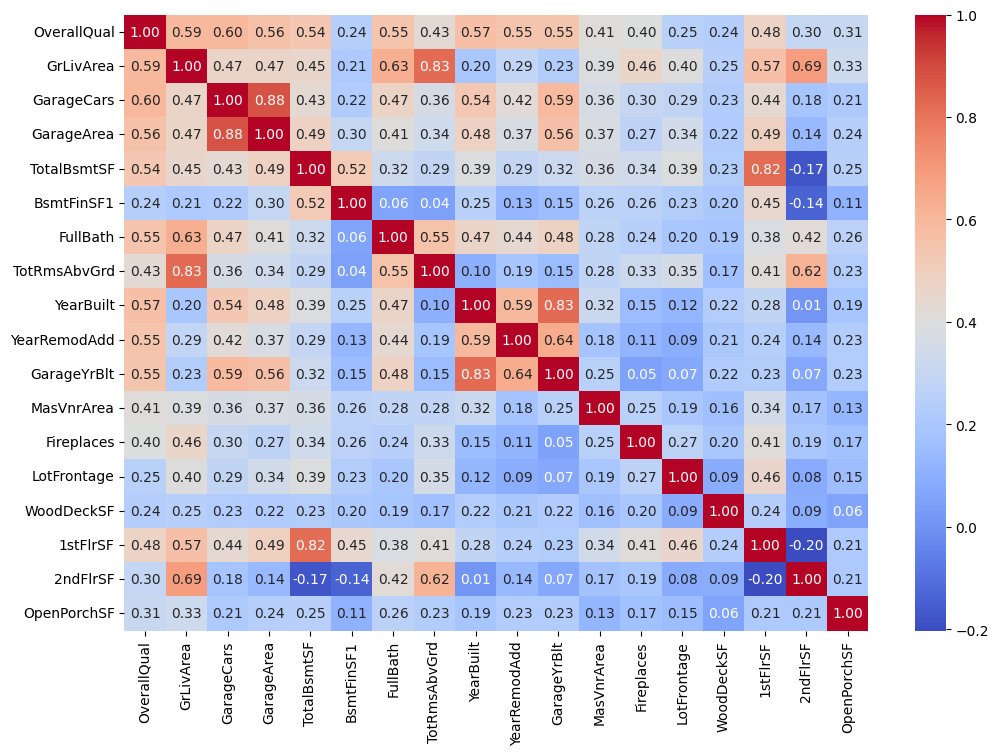

In [92]:
df_num = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'FullBath', 
            'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 
            'LotFrontage', 'WoodDeckSF', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF']


# Plotting the heatmap of the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df[df_num].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

> From the provided heatmap, we can see the following high correlations (above 0.7):

* ``GarageArea`` and ``GarageCars`` (0.88)
* ``GrLivArea`` and ``TotRmsAbvGrd`` (0.83)
* ``GarageYrBlt`` and ``YearBuilt`` (0.83)
* ``GarageYrBlt`` and ``GarageCars`` (0.82)


> Now let´s analyse the moderate and high correlation columns by plotting a combo graph including histogram, boxplot, and scatterplot.

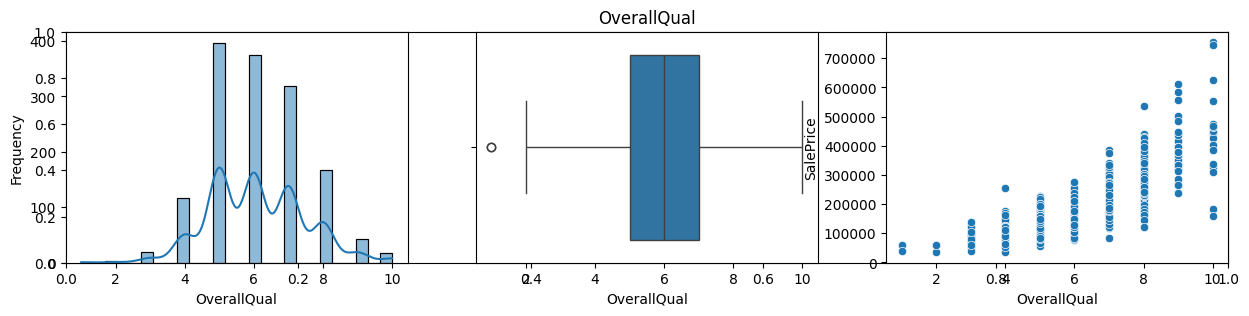

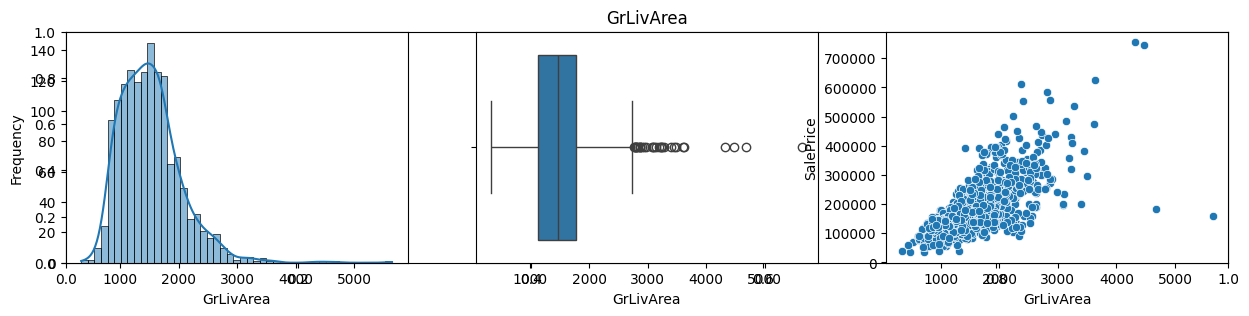

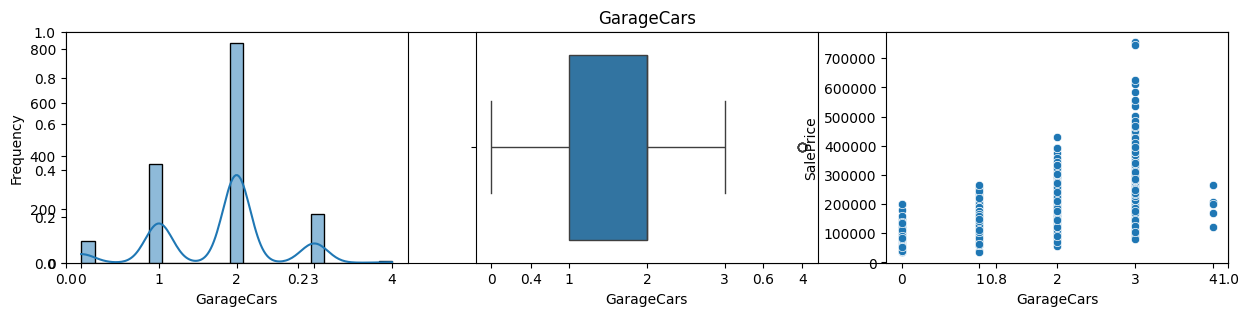

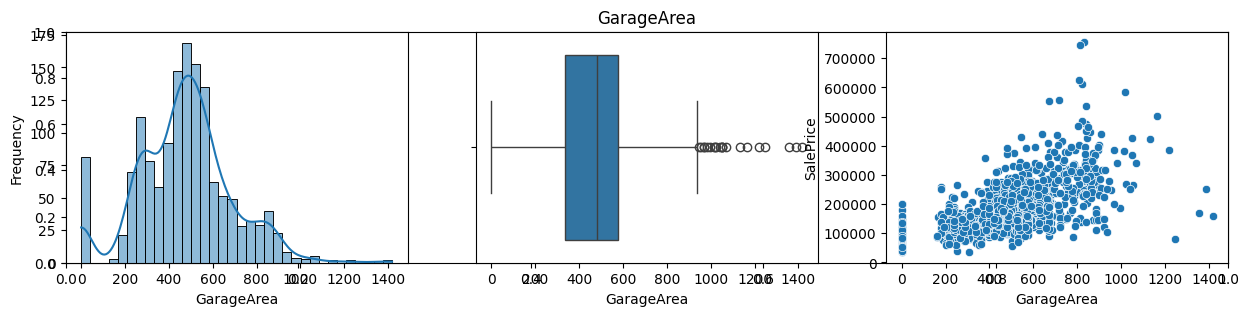

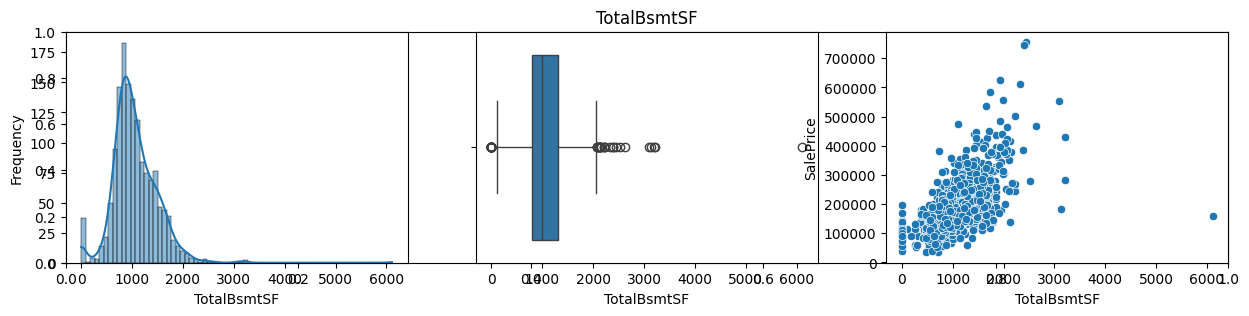

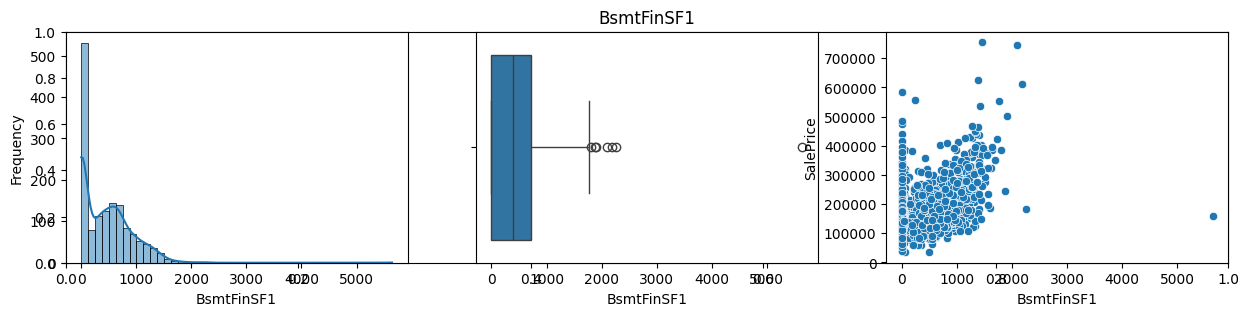

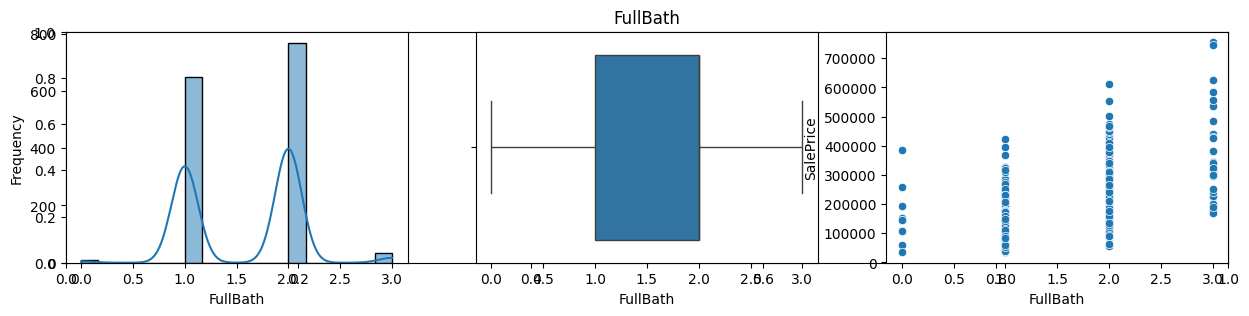

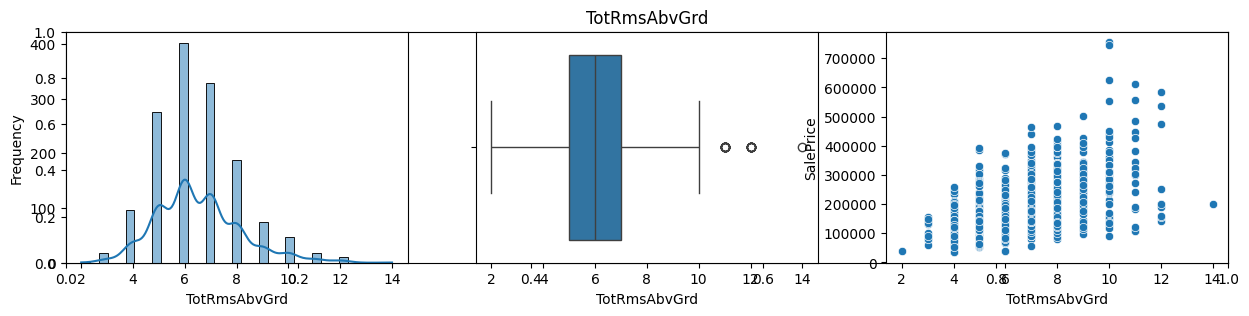

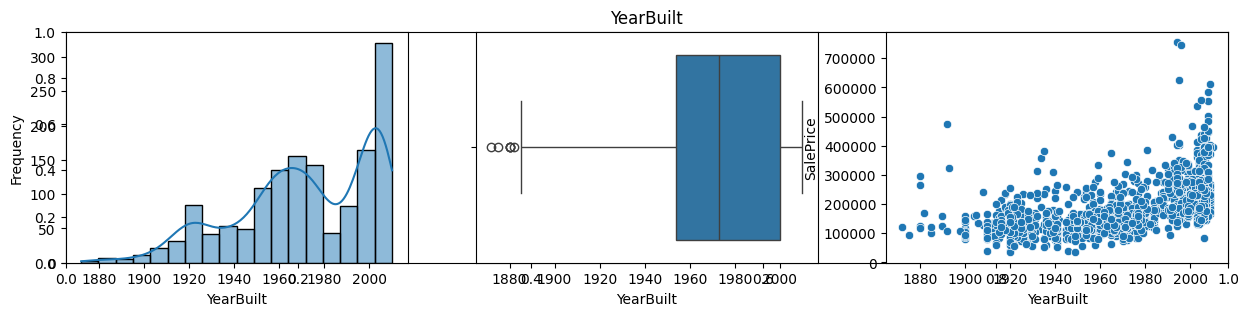

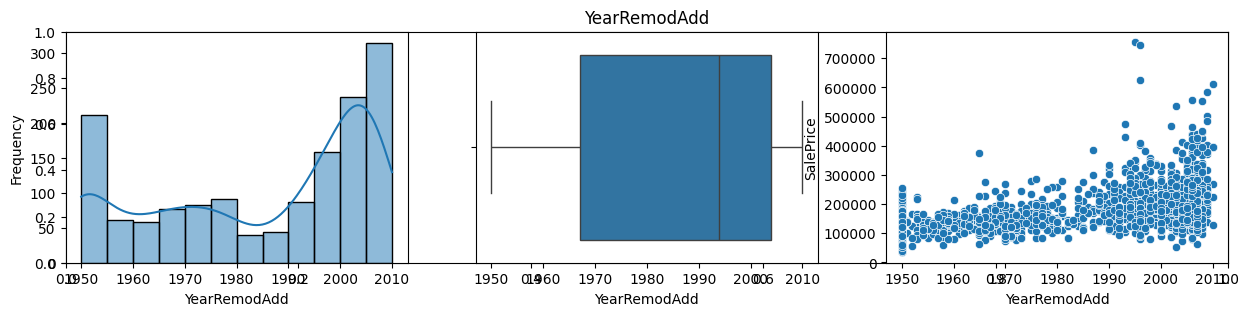

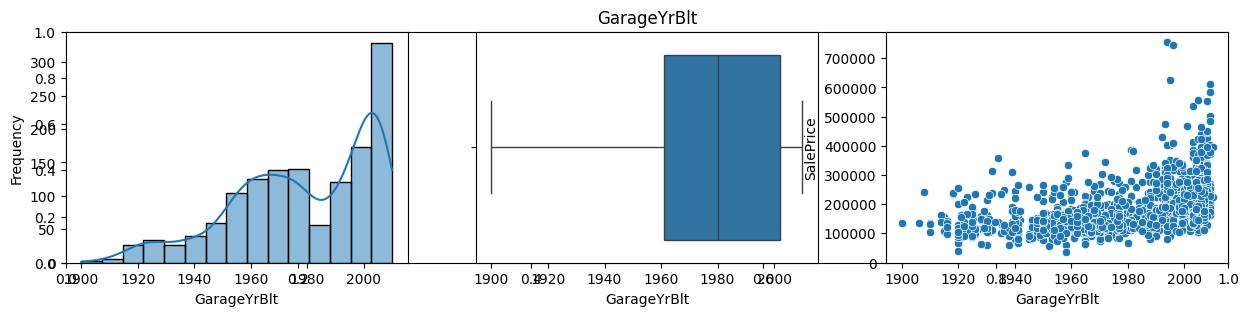

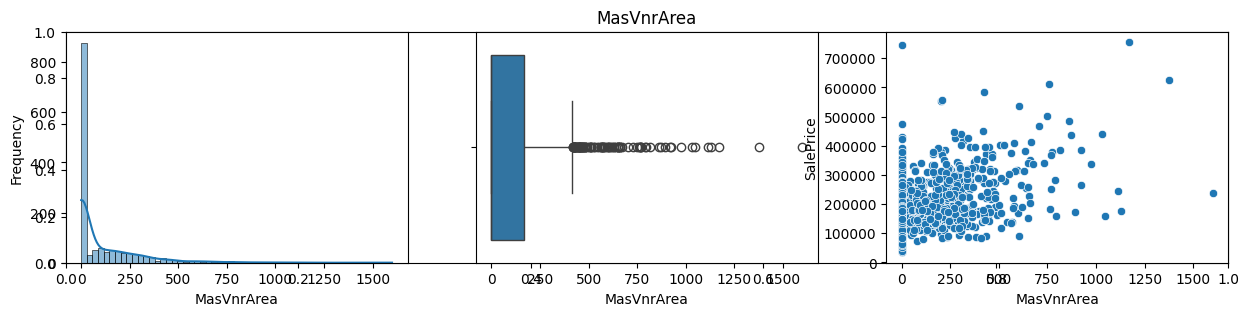

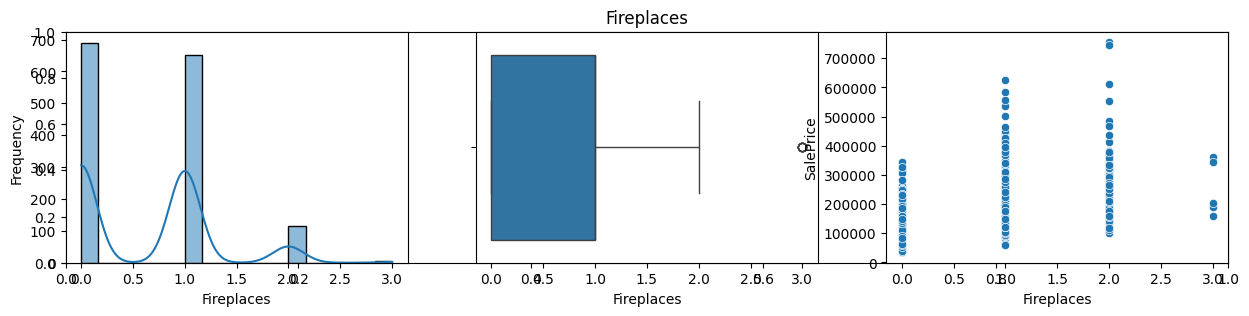

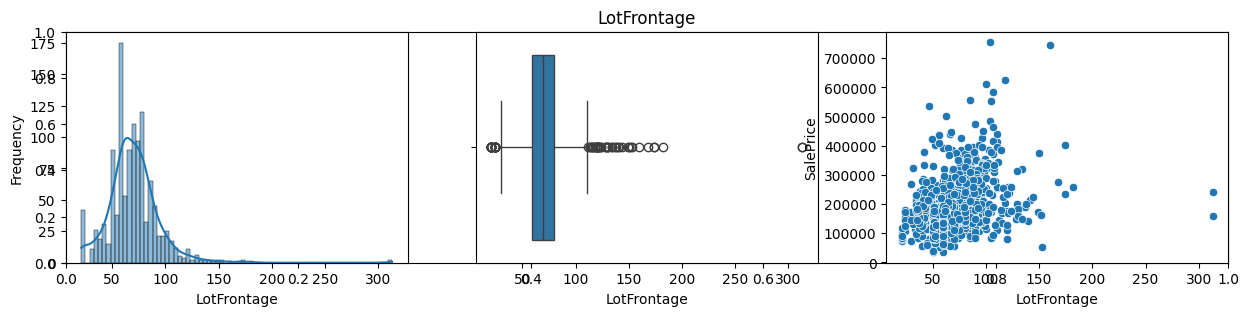

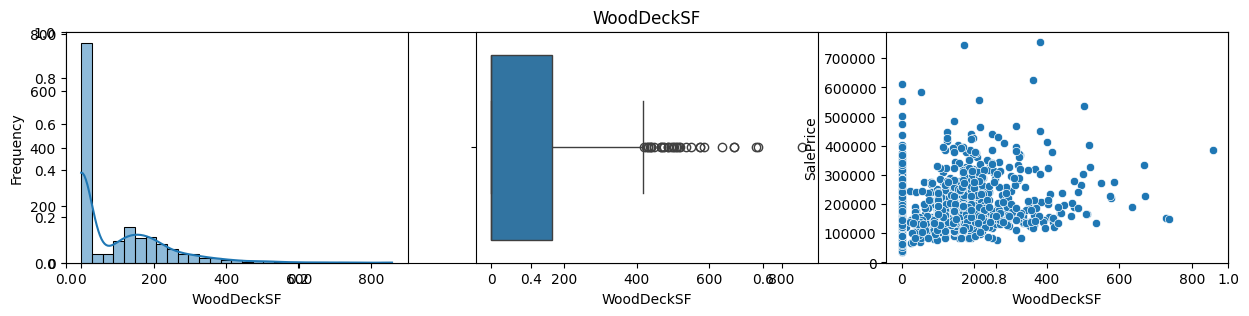

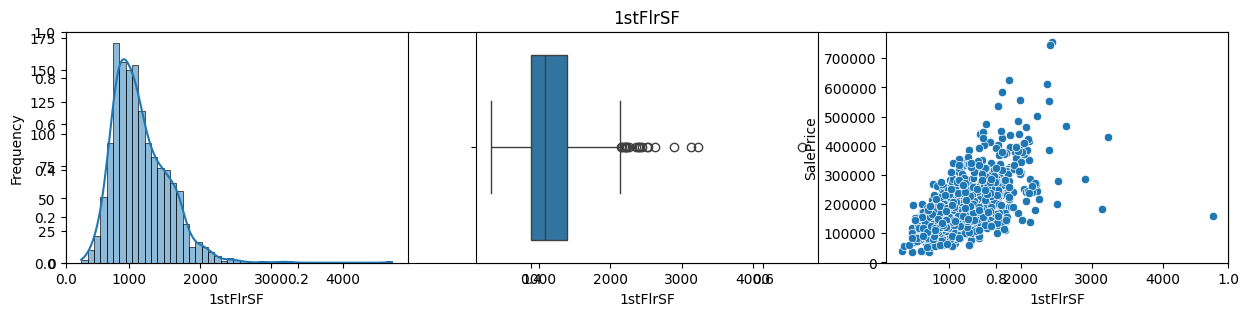

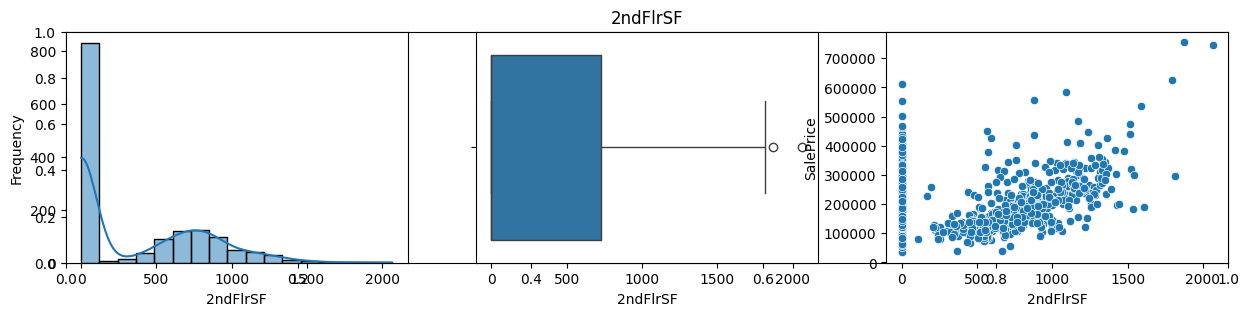

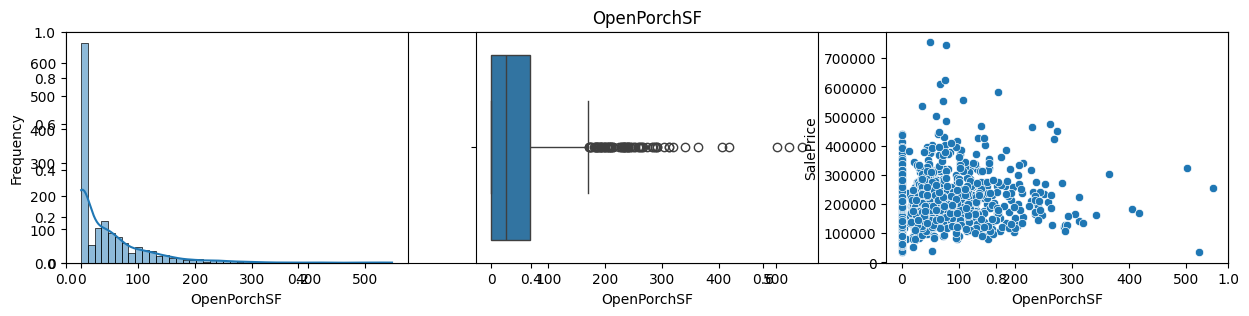

In [86]:
num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'FullBath', 
            'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 
            'LotFrontage', 'WoodDeckSF', '1stFlrSF', '2ndFlrSF', 'OpenPorchSF']


# For Numerical Columns
def hist_box_scat_graph(columns_list,df,target_column='SalePrice'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot scatter plot.
    '''
    for col in columns_list:
        plt.figure(figsize=(15, 3))
        plt.title(col)
        
        plt.subplot(1,3,1)
        sns.histplot(x = df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col])
        
        plt.subplot(1,3,3)
        sns.scatterplot(x=df[col],y=df[target_column])
        
        plt.show()
        plt.close()

# Plotting the histogram, boxplot and scatter plot for the columns
hist_box_scat_graph(num_cols,df)

**Observations:**

1. If we review the histograms of each of the columns we can see that many of them are highly skewed, so it would be a good idea to apply a normalization in the following steps.
2. Some of these columns have outliers that can be handled later with normalization like GrLivArea, ``GarageArea``, ``TotalBsmtSF``, ``BsmtFinSF1``, ``MasVnrArea``, ``LotFrontage``, ``WoodDeckSF``, ``1stFlrSF``, and ``OpenPorchSF``.



### Step 4. Feature Engineering

> Before doing any transformation, we would like to review the skewness in the data which is a very common problem especially for prices and income. The goal is to know how normalized the data is in its distribution and determine if a transformation is necessary to improve the performance of the model to be implemented. To do this we are going to graph a histogram of the price column.

Skewness: 1.8828757597682129


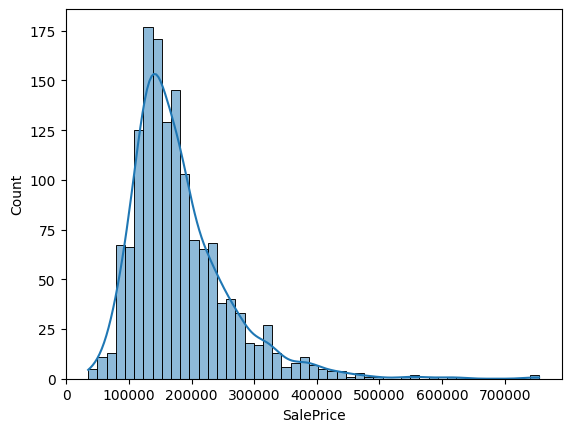

In [ ]:
print(f"Skewness: { df['SalePrice'].skew() }")
sns.histplot(x = df['SalePrice'],kde=True)
plt.show()

> We can infer from the previous graph that having a right-skewed graph to the right would be a good idea for applying a logarithmic transformation.

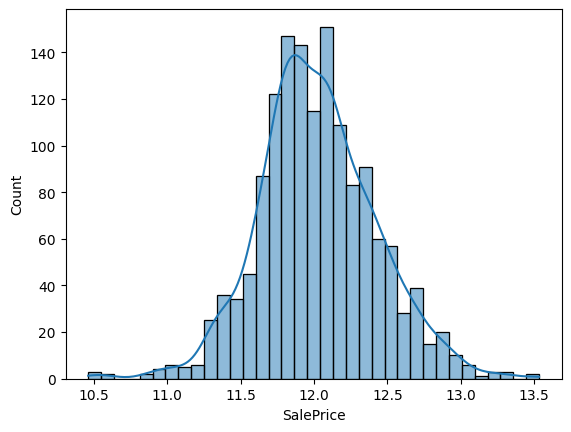

In [ ]:
# Apply log transformation
log_sale_price = np.log(df['SalePrice'])

# Plot the transformed data
sns.histplot(log_sale_price, kde=True)
plt.show()

> We have now a more normalized distribution of the target column.

> Now, let´s drop those columns with no correlation or low correlation to the target value, and others that have multicollinearity, and apply the necessary transformations.
